In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
sys.path.append(os.path.abspath(os.path.join('../src')))

In [115]:
from preprocessing import PreProcess
from overview import Overview 
overview = Overview()
preProcess = PreProcess()
from plot import Plot
pl = Plot()

In [116]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [117]:
df_preprocessed = pd.read_csv('../data/outlier_data.csv')

In [118]:
df_preprocessed.head()


bearer_id            start  start_ms              end  end_ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0   0.345557  2.082014e+14   3.366496e+10  3.552121e+13   
1   0.345557  2.082019e+14   3.368185e+10  3.579401e+13   
2   0.345557  2.082003e+14   3.376063e+10  3.528151e+13   
3   0.345557  2.082014e+14   3.375034e+10  3.535661e+13   
4   0.345557  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0  9.16456699548519E+015  ...          0.599091       308879636.0   
1                L77566A  ...          0.900568       653384965.0   
2                D42335A  ...          0.442328       279807335.0   
3                T21824A  ...          0.715336       846028530.0   
4                D88865A  ...          0.630795       569138589.0   

   social_media      google      email     youtube     netflix       gaming  \
0     1570185.0   2905912.0  3701304.0  18355943.0  17855187.0  292426453.0   
1     1933278.0   4414096.0   937385.0  39359124.0  35565545.0  609920783.0   
2     1726277.0  10229119.0  3363124.0  34425237.0  23751202.0  229980251.0   
3      657493.0  11811761.0  2070983.0  36534765.0  15092588.0  810387875.0   
4      912788.0   7748843.0  2110349.0  34222253.0  17539799.0  531237049.0   

         other   total_data  
0  180558843.0  345629377.0  
1  541959383.0  707185356.0  
2  414908351.0  307690973.0  
3  761837216.0  889352748.0  
4  564619822.0  607681403.0  

[5 rows x 53 columns]

# User Overview Analysis

### Top 10 handsets used by the customers.

In [119]:
top10_handsets = df_preprocessed['handset_type'].value_counts().nlargest(10)

In [120]:
top10_handsets = pd.DataFrame({'handset_type':top10_handsets.index,'count':top10_handsets.values})

In [121]:
top10_handsets.head()

handset_type  count
0         Huawei B528S-23A  20324
1  Apple iPhone 6S (A1688)   9419
2   Apple iPhone 6 (A1586)   9023
3                undefined   8987
4   Apple iPhone 7 (A1778)   6326

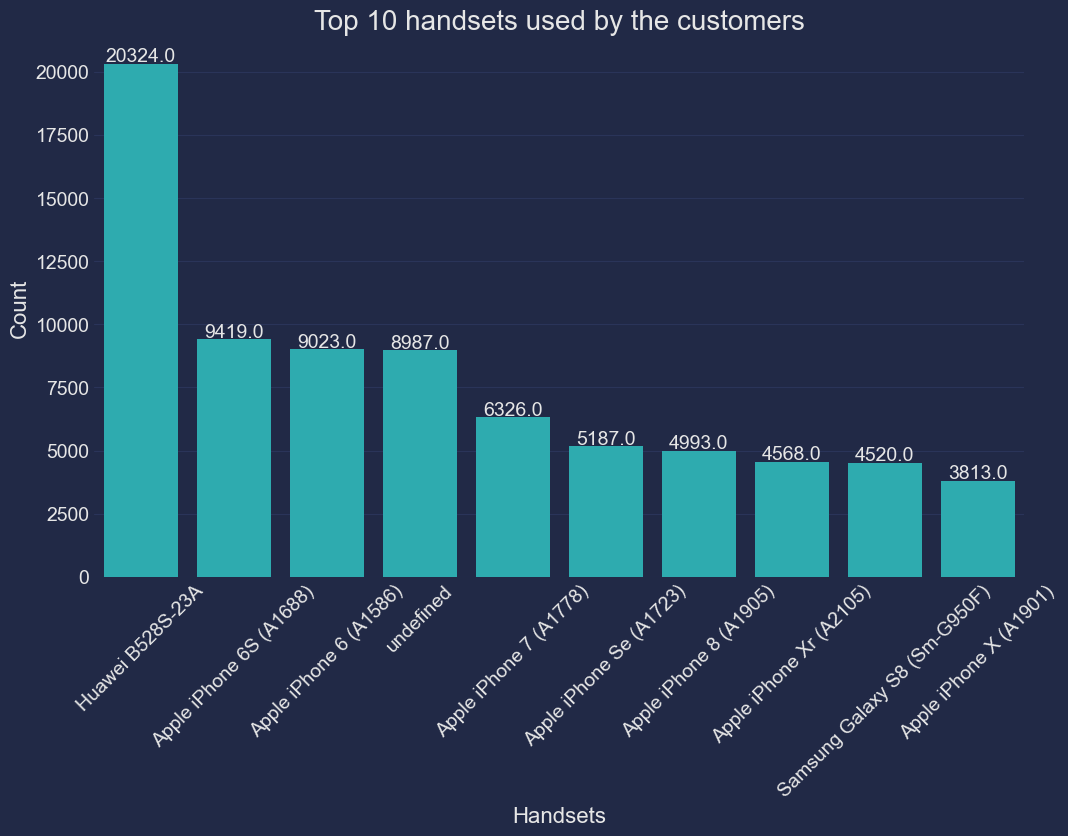

In [122]:
pl.barplot(top10_handsets, "handset_type", "count", 'Top 10 handsets used by the customers', 'Handsets', 'Count' )

## The top 3 handset manufacturers

In [123]:
top3_manufacturers = df_preprocessed['handset_manufacturer'].value_counts().nlargest(3)

In [124]:
top3_manufacturers = pd.DataFrame({'handset_manufacturer':top3_manufacturers.index,'count':top3_manufacturers.values})

In [125]:
top3_manufacturers

handset_manufacturer  count
0                Apple  60137
1              Samsung  40839
2               Huawei  34423

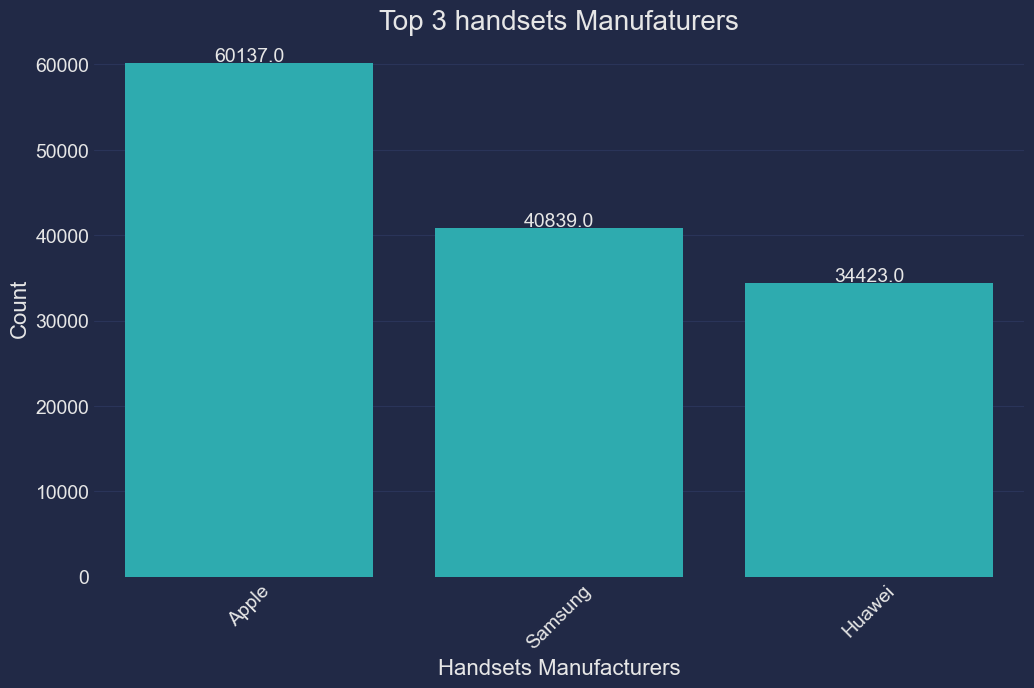

In [126]:
pl.barplot(top3_manufacturers, "handset_manufacturer", "count", 'Top 3 handsets Manufaturers', 'Handsets Manufacturers', 'Count' )

## The top 5 handsets per top 3 handset manufacturers

In [127]:
top5_per_manufacturer = {}
for manufacturer in top3_manufacturers['handset_manufacturer']:
    top5_per_manufacturer[manufacturer] = df_preprocessed.groupby('handset_manufacturer')['handset_type'].value_counts()[manufacturer].nlargest(5)

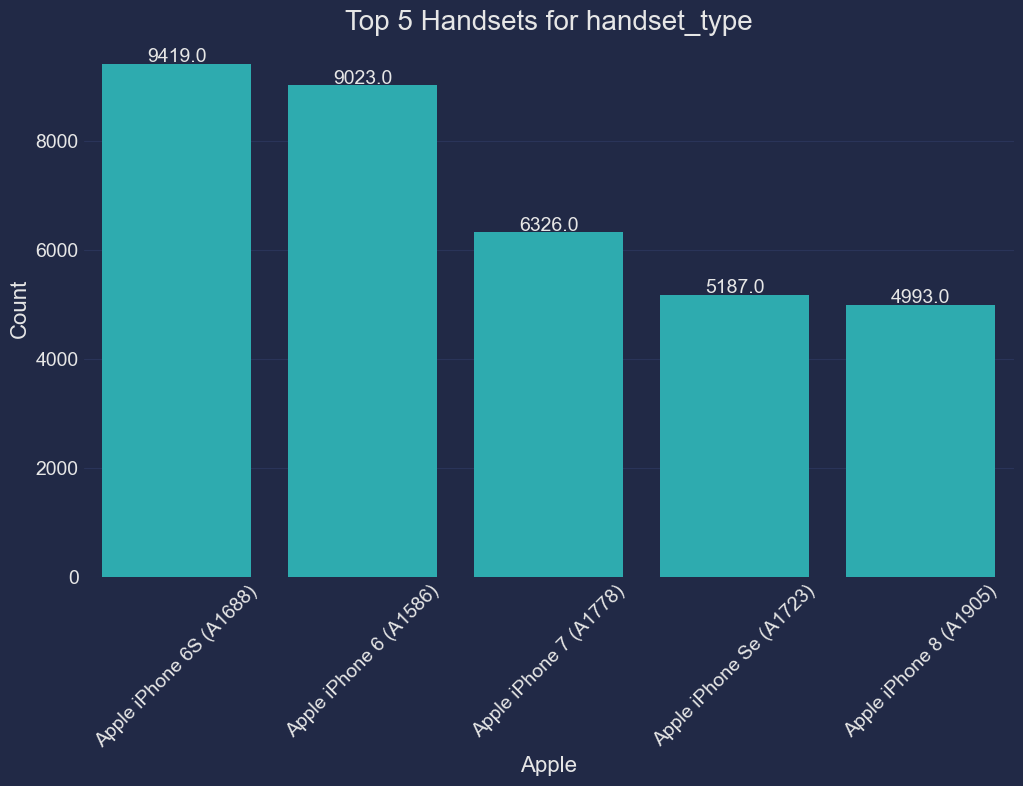

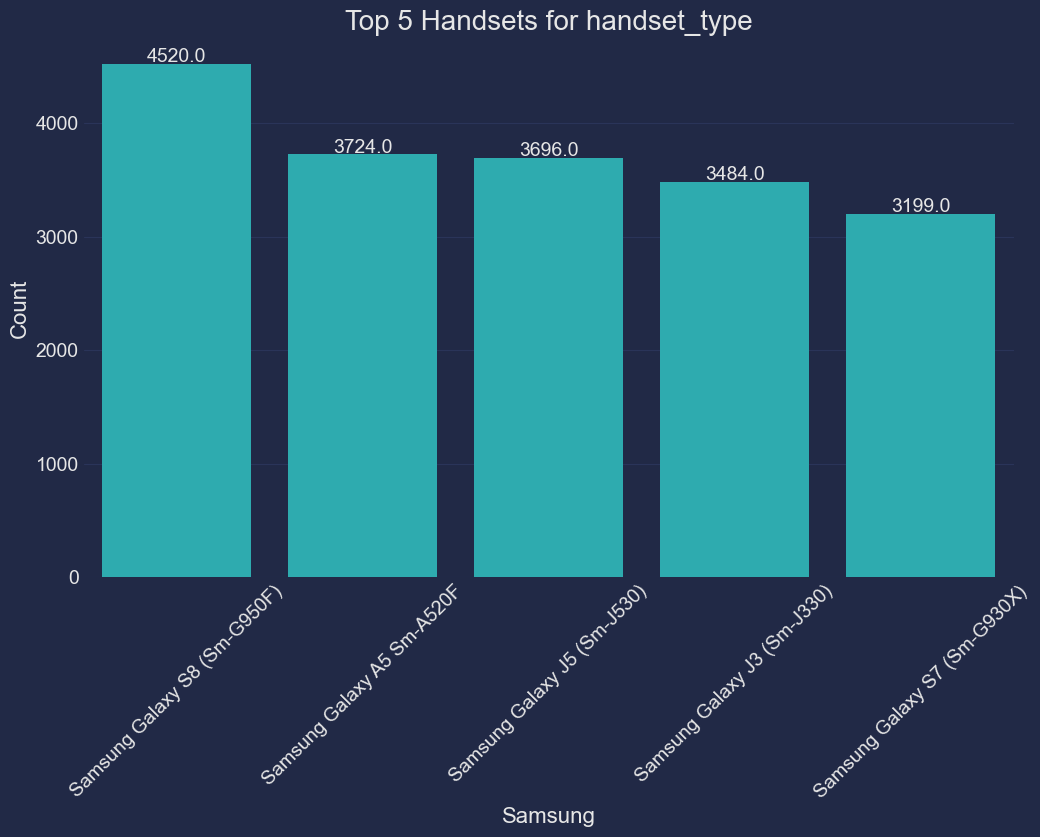

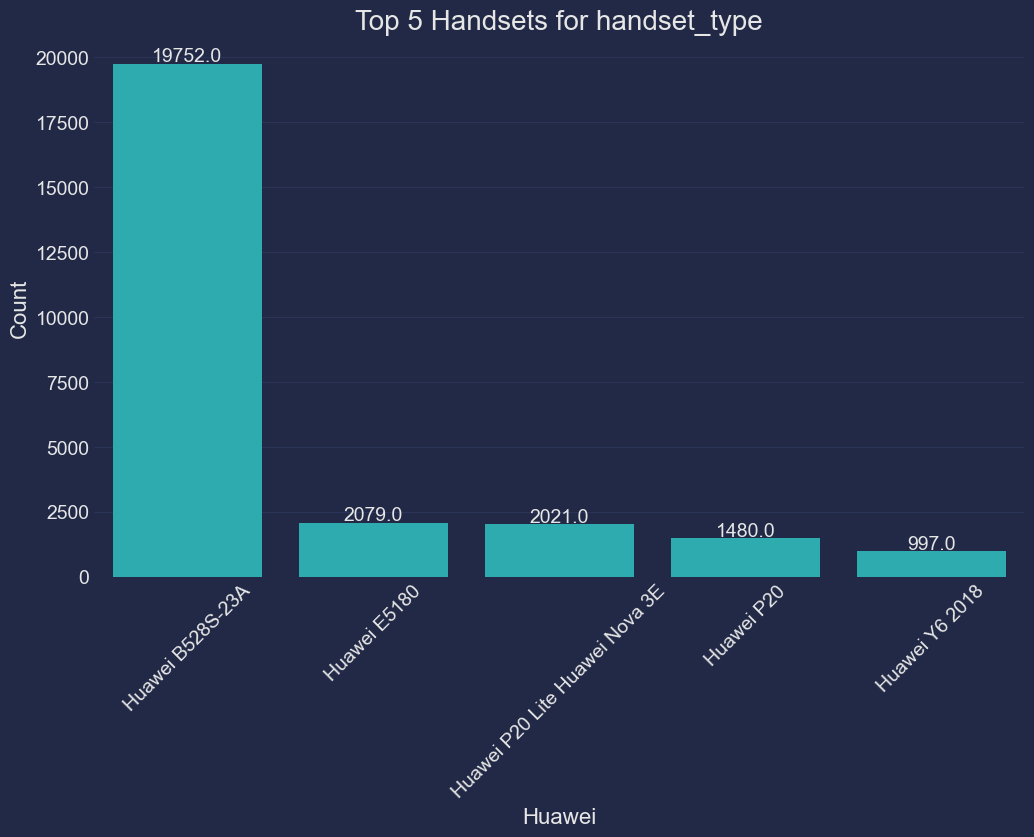

In [128]:
# Visualization of  top 5 handsets per top 3 handset manufacturers
for manufacturer, top_5 in top5_per_manufacturer.items():
    df = pd.DataFrame(top_5).reset_index()
    cols= list(df.columns)
    pl.barplot(df,cols[0], cols[1], f'Top 5 Handsets for {cols[0]}',manufacturer,'Count' )
    

### A short interpretation and recommendation to marketing teams

According to the analysis obtained, the following recommendations are suggested:

Given that a significant majority of users utilize devices manufactured by Apple, Samsung, and Huawei, it is advisable for the sales team to concentrate their efforts on engaging these specific product users.

The marketing team should highlight and promote the best-performing devices preferred by customers. Additionally, considering that Huawei's products hold a considerable number of positions among the top ten handsets, there is potential for cross-promotion with Huawei. Similarly, Samsung and Apple should also be considered for cross-promotional activities due to their market presence and popularity among users.

#### Aggregation per user

##### Number of data sessions

In [129]:
sessions =df_preprocessed.groupby('msisdn/number')['bearer_id'].count().nlargest(10)
sessions

msisdn/number
4.188282e+10    1066
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360313e+10      12
3.360452e+10      12
Name: bearer_id, dtype: int64

#### Session duration

In [130]:
df_preprocessed.groupby('msisdn/number')['dur._(ms)'].sum().nlargest(10)

msisdn/number
4.188282e+10    242.836133
3.365973e+10      7.809583
3.365936e+10      7.278654
3.362632e+10      7.223853
3.367588e+10      7.141616
3.361489e+10      6.788381
3.376054e+10      6.731575
3.362578e+10      6.442440
3.378632e+10      5.851513
3.360658e+10      5.484710
Name: dur._(ms), dtype: float64

##### Total download (DL) 

In [131]:
#  total download (DL) 
df_preprocessed.groupby('msisdn/number')[['total_dl_(bytes)', 'total_ul_(bytes)']].sum().nlargest(10, 'total_dl_(bytes)')

total_dl_(bytes)  total_ul_(bytes)
msisdn/number                                    
4.188282e+10       4.873783e+11        709.224232
3.361489e+10       8.156743e+09         10.977331
3.376054e+10       7.811295e+09         11.329591
3.362578e+10       7.770043e+09         11.596719
3.367588e+10       7.309542e+09          9.194927
3.362632e+10       7.301517e+09         10.577405
3.365973e+10       7.081602e+09          9.457901
3.366646e+10       6.903440e+09          6.604395
3.376041e+10       6.610852e+09          8.267416
3.366471e+10       6.400774e+09          7.424614

#### Total upload (UL) data

In [132]:
#  total upload (UL) 
df_preprocessed.groupby('msisdn/number')[['total_dl_(bytes)','total_ul_(bytes)']].sum().nlargest(10, 'total_ul_(bytes)')

total_dl_(bytes)  total_ul_(bytes)
msisdn/number                                    
4.188282e+10       4.873783e+11        709.224232
3.362578e+10       7.770043e+09         11.596719
3.376054e+10       7.811295e+09         11.329591
3.361489e+10       8.156743e+09         10.977331
3.362632e+10       7.301517e+09         10.577405
3.365973e+10       7.081602e+09          9.457901
3.366716e+10       5.052068e+09          9.354390
3.367588e+10       7.309542e+09          9.194927
3.376041e+10       6.610852e+09          8.267416
3.369879e+10       6.010556e+09          7.657629

#### Total data volume (in Bytes) during this session for each application

In [133]:
df_preprocessed["social_media"] = df_preprocessed["social_media_dl_(bytes)"] + df_preprocessed['social_media_ul_(bytes)']
df_preprocessed["google"] = df_preprocessed["google_dl_(bytes)"] + df_preprocessed["google_ul_(bytes)"]
df_preprocessed['email'] = df_preprocessed["email_dl_(bytes)"] + df_preprocessed["email_ul_(bytes)"]
df_preprocessed['youtube'] = df_preprocessed["youtube_dl_(bytes)"] + df_preprocessed["youtube_ul_(bytes)"]
df_preprocessed['netflix'] = df_preprocessed["netflix_dl_(bytes)"] + df_preprocessed["netflix_ul_(bytes)"]
df_preprocessed["gaming"] = df_preprocessed["gaming_dl_(bytes)"] + df_preprocessed["gaming_ul_(bytes)"]
df_preprocessed['other'] = df_preprocessed["other_dl_(bytes)"]+df_preprocessed["other_ul_(bytes)"]
df_preprocessed['total_data'] = df_preprocessed['total_dl_(bytes)'] + df_preprocessed['total_ul_(bytes)']

In [134]:
user_data = df_preprocessed.groupby('msisdn/number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().nlargest(20, 'total_data')

In [135]:
user_data = df_preprocessed.groupby('msisdn/number')[['social_media', 'google', 'email', 'youtube', 'gaming', 'other', 'total_data']].sum().sort_values('total_data', ascending=False)

In [136]:
user_data.head()

social_media        google         email       youtube  \
msisdn/number                                                           
4.188282e+10   1.973817e+09  8.248577e+09  2.399880e+09  2.434073e+10   
3.361489e+10   2.829454e+07  1.279738e+08  4.078863e+07  3.943702e+08   
3.376054e+10   3.978319e+07  1.232231e+08  3.369377e+07  3.962892e+08   
3.362578e+10   2.713550e+07  1.423079e+08  4.063397e+07  4.529588e+08   
3.367588e+10   1.922292e+07  1.098605e+08  3.151442e+07  3.174106e+08   

                     gaming         other    total_data  
msisdn/number                                            
4.188282e+10   4.614780e+11  4.509784e+11  4.873783e+11  
3.361489e+10   7.749432e+09  7.639264e+09  8.156744e+09  
3.376054e+10   7.461045e+09  4.716134e+09  7.811295e+09  
3.362578e+10   7.326673e+09  6.354583e+09  7.770043e+09  
3.367588e+10   6.970568e+09  6.798515e+09  7.309542e+09

In [137]:
user_data.reset_index(inplace=True)

In [138]:
user_data

msisdn/number  social_media        google         email       youtube  \
0        4.188282e+10  1.973817e+09  8.248577e+09  2.399880e+09  2.434073e+10   
1        3.361489e+10  2.829454e+07  1.279738e+08  4.078863e+07  3.943702e+08   
2        3.376054e+10  3.978319e+07  1.232231e+08  3.369377e+07  3.962892e+08   
3        3.362578e+10  2.713550e+07  1.423079e+08  4.063397e+07  4.529588e+08   
4        3.367588e+10  1.922292e+07  1.098605e+08  3.151442e+07  3.174106e+08   
...               ...           ...           ...           ...           ...   
106852   3.366668e+10  7.506630e+05  4.339447e+06  2.576936e+06  3.927196e+06   
106853   3.376058e+10  1.267174e+06  5.554673e+06  1.003943e+06  2.086153e+07   
106854   3.365880e+10  2.698433e+06  5.790168e+06  1.768788e+06  1.052791e+07   
106855   3.365920e+10  1.277721e+06  4.088830e+06  3.242840e+05  1.266156e+07   
106856   3.376742e+10  3.062180e+05  1.059952e+06  2.978450e+06  7.496356e+06   

              gaming         other    total_data  
0       4.614780e+11  4.509784e+11  4.873783e+11  
1       7.749432e+09  7.639264e+09  8.156744e+09  
2       7.461045e+09  4.716134e+09  7.811295e+09  
3       7.326673e+09  6.354583e+09  7.770043e+09  
4       6.970568e+09  6.798515e+09  7.309542e+09  
...              ...           ...           ...  
106852  1.980834e+06  2.987000e+08  9.455608e+06  
106853  9.128431e+06  3.163563e+08  9.275627e+06  
106854  8.655875e+06  3.446320e+08  9.199519e+06  
106855  7.060100e+06  5.113630e+08  9.046209e+06  
106856  1.334428e+07  1.269929e+08  8.827083e+06  

[106857 rows x 8 columns]

In [139]:
user_data.corr()

msisdn/number  social_media    google     email   youtube  \
msisdn/number       1.000000     -0.000809 -0.000228  0.000087  0.000414   
social_media       -0.000809      1.000000  0.968997  0.967901  0.971348   
google             -0.000228      0.968997  1.000000  0.974074  0.977704   
email               0.000087      0.967901  0.974074  1.000000  0.976294   
youtube             0.000414      0.971348  0.977704  0.976294  1.000000   
gaming             -0.001147      0.962460  0.968683  0.967100  0.970937   
other              -0.000731      0.961808  0.967954  0.966628  0.970384   
total_data         -0.001089      0.964482  0.970937  0.969132  0.973361   

                 gaming     other  total_data  
msisdn/number -0.001147 -0.000731   -0.001089  
social_media   0.962460  0.961808    0.964482  
google         0.968683  0.967954    0.970937  
email          0.967100  0.966628    0.969132  
youtube        0.970937  0.970384    0.973361  
gaming         1.000000  0.961084    0.999911  
other          0.961084  1.000000    0.962972  
total_data     0.999911  0.962972    1.000000

#### Exploratory data analysis on those data

##### Non-Graphical Univariate Analysis

In [140]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df_preprocessed.select_dtypes(include=np.number).columns
cat_cols = list(set(df_preprocessed.columns) - set(num_cols) - set(['start','end']))

Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming)

In [141]:
# Session aggregation of social_media per user
user_stat_per_app = df_preprocessed.groupby('msisdn/number').agg({'social_media': 'sum', 'google': 'sum', 'email': 'sum', 'youtube': 'sum', 'gaming': 'sum', 'other': 'sum'})


In [142]:
user_stat_per_app.head()

social_media      google      email     youtube        gaming  \
msisdn/number                                                                  
3.360100e+10      2232135.0   4389005.0  1331362.0  21624548.0  8.124587e+08   
3.360100e+10      2660565.0   5334863.0  3307781.0  12432223.0  1.197501e+08   
3.360100e+10      3195623.0   3443126.0  3205380.0  21333570.0  5.388277e+08   
3.360101e+10       280294.0   9678493.0  2284670.0   6977321.0  3.911261e+08   
3.360101e+10      2912542.0  18499616.0  3305469.0  41533002.0  1.314798e+09   

                     other  
msisdn/number               
3.360100e+10   386570872.0  
3.360100e+10   281710071.0  
3.360100e+10   501693672.0  
3.360101e+10    35279702.0  
3.360101e+10   804804484.0

In [143]:
user_stat_per_app.describe()

social_media        google         email       youtube        gaming  \
count  1.068570e+05  1.068570e+05  1.068570e+05  1.068570e+05  1.068570e+05   
mean   2.566415e+06  1.095953e+07  3.171225e+06  3.178589e+07  6.040820e+08   
std    6.325032e+06  2.630542e+07  7.661339e+06  7.735388e+07  1.479703e+09   
min    1.563000e+03  4.033000e+04  1.817600e+04  7.890300e+04  3.063580e+05   
25%    1.211309e+06  5.942683e+06  1.674484e+06  1.863145e+07  2.880666e+08   
50%    2.303811e+06  9.586186e+06  2.799854e+06  2.680040e+07  5.423501e+08   
75%    3.307524e+06  1.321496e+07  3.847205e+06  3.792829e+07  7.773115e+08   
max    1.973817e+09  8.248577e+09  2.399880e+09  2.434073e+10  4.614780e+11   

              other  
count  1.068570e+05  
mean   6.027236e+08  
std    1.449064e+09  
min    1.490450e+05  
25%    2.855649e+08  
50%    5.398401e+08  
75%    7.754189e+08  
max    4.509784e+11

In [144]:
# Session aggregation of Durations apps per user
user_stat_per = df_preprocessed.groupby('msisdn/number').agg({'bearer_id': 'count', 'dur._(ms)': 'sum', 'total_ul_(bytes)': 'sum', 'total_dl_(bytes)': 'sum', 'total_data': 'sum'})

In [145]:
user_stat_per.head()

bearer_id  dur._(ms)  total_ul_(bytes)  total_dl_(bytes)  \
msisdn/number                                                             
3.360100e+10           1   0.477755          0.586774      8.426375e+08   
3.360100e+10           1   0.759016          0.587682      1.207552e+08   
3.360100e+10           1   0.557320          0.644304      5.566597e+08   
3.360101e+10           1   0.186327          0.308726      4.019932e+08   
3.360101e+10           2   0.099494          1.565618      1.363130e+09   

                 total_data  
msisdn/number                
3.360100e+10   8.426375e+08  
3.360100e+10   1.207552e+08  
3.360100e+10   5.566597e+08  
3.360101e+10   4.019932e+08  
3.360101e+10   1.363130e+09

In [146]:
user_stat_per.describe()

bearer_id      dur._(ms)  total_ul_(bytes)  total_dl_(bytes)  \
count  106857.000000  106857.000000     106857.000000      1.068570e+05   
mean        1.403755       0.514414          0.920050      6.382078e+08   
std         3.355032       0.849719          2.239454      1.559802e+09   
min         1.000000       0.000000          0.000000      8.827082e+06   
25%         1.000000       0.268852          0.592577      3.148302e+08   
50%         1.000000       0.385080          0.746286      5.703713e+08   
75%         2.000000       0.691114          1.001175      8.073701e+08   
max      1066.000000     242.836133        709.224232      4.873783e+11   

         total_data  
count  1.068570e+05  
mean   6.382078e+08  
std    1.559802e+09  
min    8.827083e+06  
25%    3.148302e+08  
50%    5.703713e+08  
75%    8.073701e+08  
max    4.873783e+11

In [147]:
# Handset_manufacturers distinct value
df_preprocessed.handset_manufacturer.value_counts()

handset_manufacturer
Apple                               60137
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Option Nv                               1
M S Soha Enterprise                     1
Name: count, Length: 170, dtype: int64

There are 170 different handset manufacturers <br><br>
Apple, Samsung, & Huawei are the most popular manufacturers <br><br>
Apple         &emsp;&emsp;                    60137 <br>
Samsung       &emsp;&emsp;                    40839 <br>
Huawei        &emsp;&emsp;                    34423 <br>

In [148]:
# Last_location distinct values
df_preprocessed.last_location_name.value_counts()

last_location_name
D41377B                  1233
D17085A                    59
D72396C                    57
D73604C                    55
9.16456698599501E+015      55
                         ... 
G93294B                     1
D70721A                     1
G70820A                     1
T10340B                     1
K62027B                     1
Name: count, Length: 45547, dtype: int64

There are 45547 different locations used <br><br>
The location with ID D41377B is the most frequent

In [149]:
# Handset_type distinct values
df_preprocessed.handset_type.value_counts()

handset_type
Huawei B528S-23A              20324
Apple iPhone 6S (A1688)        9419
Apple iPhone 6 (A1586)         9023
undefined                      8987
Apple iPhone 7 (A1778)         6326
                              ...  
Nokia Lumia 925 Lumia 925         1
Nubia Technology. Z17 Mini        1
Lidaxin Technolo. My81            1
Nokia X                           1
Archos Sa Access 50 4G            1
Name: count, Length: 1396, dtype: int64

In [150]:
# Non-Graphical Univariate analysis for the Quantitative variables
df_preprocessed[num_cols].describe()

bearer_id       start_ms         end_ms      dur._(ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880       0.366456   
std    2.883600e+18     288.610872     288.096693       0.209841   
min    6.917538e+18       0.000000       0.000000       0.000000   
25%    7.349883e+18     250.000000     251.000000       0.219306   
50%    7.349883e+18     499.000000     500.000000       0.345557   
75%    1.304243e+19     749.000000     750.000000       0.469559   
max    1.318654e+19     999.000000     999.000000       1.000000   

               imsi  msisdn/number          imei  avg_rtt_dl_(ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   4.188282e+10  4.847455e+13         0.294972   
std    2.144722e+10   2.438731e+12  2.237359e+13         0.172852   
min    2.040471e+14   3.360100e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365151e+10  3.546261e+13         0.161290   
50%    2.082015e+14   3.366380e+10  3.572241e+13         0.248848   
75%    2.082018e+14   3.368473e+10  8.611970e+13         0.479263   
max    2.140743e+14   8.823971e+14  9.900120e+13         1.000000   

       avg_rtt_ul_(ms)  avg_bearer_tp_dl_(kbps)  ...  total_ul_(bytes)  \
count    150001.000000            150001.000000  ...     150001.000000   
mean          0.241357                 0.142361  ...          0.655421   
std           0.210847                 0.251011  ...          0.175558   
min           0.000000                 0.000000  ...          0.000000   
25%           0.069767                 0.000704  ...          0.536717   
50%           0.162791                 0.001031  ...          0.676774   
75%           0.410765                 0.196858  ...          0.783523   
max           1.000000                 1.000000  ...          1.000000   

       total_dl_(bytes)  social_media        google         email  \
count      1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean       4.546434e+08  1.828250e+06  7.807295e+06  2.259102e+06   
std        2.441421e+08  1.035646e+06  3.516420e+06  1.071109e+06   
min        7.114041e+06  1.563000e+03  4.033000e+04  8.359000e+03   
25%        2.431072e+08  9.322180e+05  4.943599e+06  1.359344e+06   
50%        4.558409e+08  1.826471e+06  7.812835e+06  2.263567e+06   
75%        6.657051e+08  2.727487e+06  1.068280e+07  3.159818e+06   
max        9.029696e+08  3.650861e+06  1.552878e+07  4.518036e+06   

            youtube       netflix        gaming         other    total_data  
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  
mean   2.264348e+07  2.262861e+07  4.303331e+08  4.293653e+08  4.546434e+08  
std    9.246800e+06  9.260820e+06  2.440199e+08  2.432681e+08  2.441421e+08  
min    7.890300e+04  9.843200e+04  3.063580e+05  1.490450e+05  7.114041e+06  
25%    1.599846e+07  1.597946e+07  2.187279e+08  2.185534e+08  2.431072e+08  
50%    2.266177e+07  2.263554e+07  4.316150e+08  4.299865e+08  4.558409e+08  
75%    2.929260e+07  2.929044e+07  6.414159e+08  6.399275e+08  6.657051e+08  
max    4.519008e+07  4.519815e+07  8.592028e+08  8.595209e+08  9.029696e+08  

[8 rows x 48 columns]

In [151]:
df_preprocessed['total_data'].describe()

count    1.500010e+05
mean     4.546434e+08
std      2.441421e+08
min      7.114041e+06
25%      2.431072e+08
50%      4.558409e+08
75%      6.657051e+08
max      9.029696e+08
Name: total_data, dtype: float64

In [152]:
df_preprocessed['total_dl_(bytes)'].describe()

count    1.500010e+05
mean     4.546434e+08
std      2.441421e+08
min      7.114041e+06
25%      2.431072e+08
50%      4.558409e+08
75%      6.657051e+08
max      9.029696e+08
Name: total_dl_(bytes), dtype: float64

Data Range

In [153]:
df_preprocessed['start'] = pd.to_datetime(df_preprocessed['start'], errors='coerce')
df_preprocessed['end'] = pd.to_datetime(df_preprocessed['end'], errors='coerce')

In [154]:
date_range = str(df_preprocessed['start'].dt.date.min()) + ' to ' +str(df_preprocessed['end'].dt.date.max())

In [155]:
date_range

'2019-04-04 to 2019-04-30'

### Univariate Graphical EDA

sns.swarmplot(x=df_preprocessed['total_dl_(bytes)'])

In [156]:
df_preprocessed

bearer_id               start  start_ms                 end  \
0       1.311448e+19 2019-04-04 12:01:00  770.0000 2019-04-25 14:35:00   
1       1.311448e+19 2019-04-09 13:04:00  235.0000 2019-04-25 08:15:00   
2       1.311448e+19 2019-04-09 17:42:00    1.0000 2019-04-25 11:58:00   
3       1.311448e+19 2019-04-10 00:31:00  486.0000 2019-04-25 07:36:00   
4       1.311448e+19 2019-04-12 20:10:00  565.0000 2019-04-25 10:40:00   
...              ...                 ...       ...                 ...   
149996  7.277826e+18 2019-04-29 07:28:00  451.0000 2019-04-30 06:02:00   
149997  7.349883e+18 2019-04-29 07:28:00  483.0000 2019-04-30 10:41:00   
149998  1.311448e+19 2019-04-29 07:28:00  283.0000 2019-04-30 10:46:00   
149999  1.311448e+19 2019-04-29 07:28:00  696.0000 2019-04-30 10:40:00   
150000  1.013887e+19 2019-04-26 07:25:00  499.1882 2019-04-25 00:01:00   

           end_ms  dur._(ms)          imsi  msisdn/number          imei  \
0       662.00000   0.345557  2.082014e+14   3.366496e+10  3.552121e+13   
1       606.00000   0.345557  2.082019e+14   3.368185e+10  3.579401e+13   
2       652.00000   0.345557  2.082003e+14   3.376063e+10  3.528151e+13   
3       171.00000   0.345557  2.082014e+14   3.375034e+10  3.535661e+13   
4       954.00000   0.345557  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...        ...           ...            ...           ...   
149996  214.00000   0.323021  2.082022e+14   3.365069e+10  3.548311e+13   
149997  187.00000   0.396006  2.082019e+14   3.366345e+10  3.566051e+13   
149998  810.00000   0.397223  2.082017e+14   3.362189e+10  3.572121e+13   
149999  327.00000   0.395745  2.082021e+14   3.361962e+10  8.618620e+13   
150000  498.80088   0.424950  2.082016e+14   4.188282e+10  4.847455e+13   

           last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0       9.16456699548519E+015  ...          0.599091      3.088796e+08   
1                     L77566A  ...          0.900568      6.533850e+08   
2                     D42335A  ...          0.442328      2.798073e+08   
3                     T21824A  ...          0.715336      8.460285e+08   
4                     D88865A  ...          0.630795      5.691386e+08   
...                       ...  ...               ...               ...   
149996                D20434A  ...          0.968260      5.741753e+08   
149997                D10223C  ...          0.641267      6.666488e+08   
149998                T51102A  ...          0.566602      5.927864e+08   
149999                L88342B  ...          0.473136      3.718959e+08   
150000                D41377B  ...          0.676384      4.546434e+08   

        social_media        google         email       youtube       netflix  \
0       1.570185e+06  2.905912e+06  3.701304e+06  1.835594e+07  1.785519e+07   
1       1.933278e+06  4.414096e+06  9.373850e+05  3.935912e+07  3.556554e+07   
2       1.726277e+06  1.022912e+07  3.363124e+06  3.442524e+07  2.375120e+07   
3       6.574930e+05  1.181176e+07  2.070983e+06  3.653476e+07  1.509259e+07   
4       9.127880e+05  7.748843e+06  2.110349e+06  3.422225e+07  1.753980e+07   
...              ...           ...           ...           ...           ...   
149996  3.517065e+06  1.278491e+07  6.908760e+05  2.795510e+07  3.756186e+07   
149997  2.352181e+06  4.415361e+06  2.121718e+06  2.216552e+07  4.064329e+07   
149998  1.260239e+06  6.585469e+06  2.058277e+06  2.451641e+07  1.502970e+07   
149999  8.231090e+05  7.757267e+06  2.850914e+06  1.712251e+07  1.649484e+07   
150000  1.828250e+06  7.807295e+06  2.259102e+06  2.264348e+07  2.262861e+07   

              gaming         other    total_data  
0       2.924265e+08  1.805588e+08  3.088796e+08  
1       6.099208e+08  5.419594e+08  6.533850e+08  
2       2.299803e+08  4.149084e+08  2.798073e+08  
3       8.103879e+08  7.618372e+08  8.460285e+08  
4       5.312370e+08  5.646198e+08  5.691386e+08  
...              ...           ...           ...  
149996  5.3580

In [157]:
df_preprocessed.head()

bearer_id               start  start_ms                 end  end_ms  \
0  1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   662.0   
1  1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   606.0   
2  1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   652.0   
3  1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   171.0   
4  1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0   0.345557  2.082014e+14   3.366496e+10  3.552121e+13   
1   0.345557  2.082019e+14   3.368185e+10  3.579401e+13   
2   0.345557  2.082003e+14   3.376063e+10  3.528151e+13   
3   0.345557  2.082014e+14   3.375034e+10  3.535661e+13   
4   0.345557  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0  9.16456699548519E+015  ...          0.599091       308879636.0   
1                L77566A  ...          0.900568       653384965.0   
2                D42335A  ...          0.442328       279807335.0   
3                T21824A  ...          0.715336       846028530.0   
4                D88865A  ...          0.630795       569138589.0   

   social_media      google      email     youtube     netflix       gaming  \
0     1570185.0   2905912.0  3701304.0  18355943.0  17855187.0  292426453.0   
1     1933278.0   4414096.0   937385.0  39359124.0  35565545.0  609920783.0   
2     1726277.0  10229119.0  3363124.0  34425237.0  23751202.0  229980251.0   
3      657493.0  11811761.0  2070983.0  36534765.0  15092588.0  810387875.0   
4      912788.0   7748843.0  2110349.0  34222253.0  17539799.0  531237049.0   

         other    total_data  
0  180558843.0  3.088796e+08  
1  541959383.0  6.533850e+08  
2  414908351.0  2.798073e+08  
3  761837216.0  8.460285e+08  
4  564619822.0  5.691386e+08  

[5 rows x 53 columns]

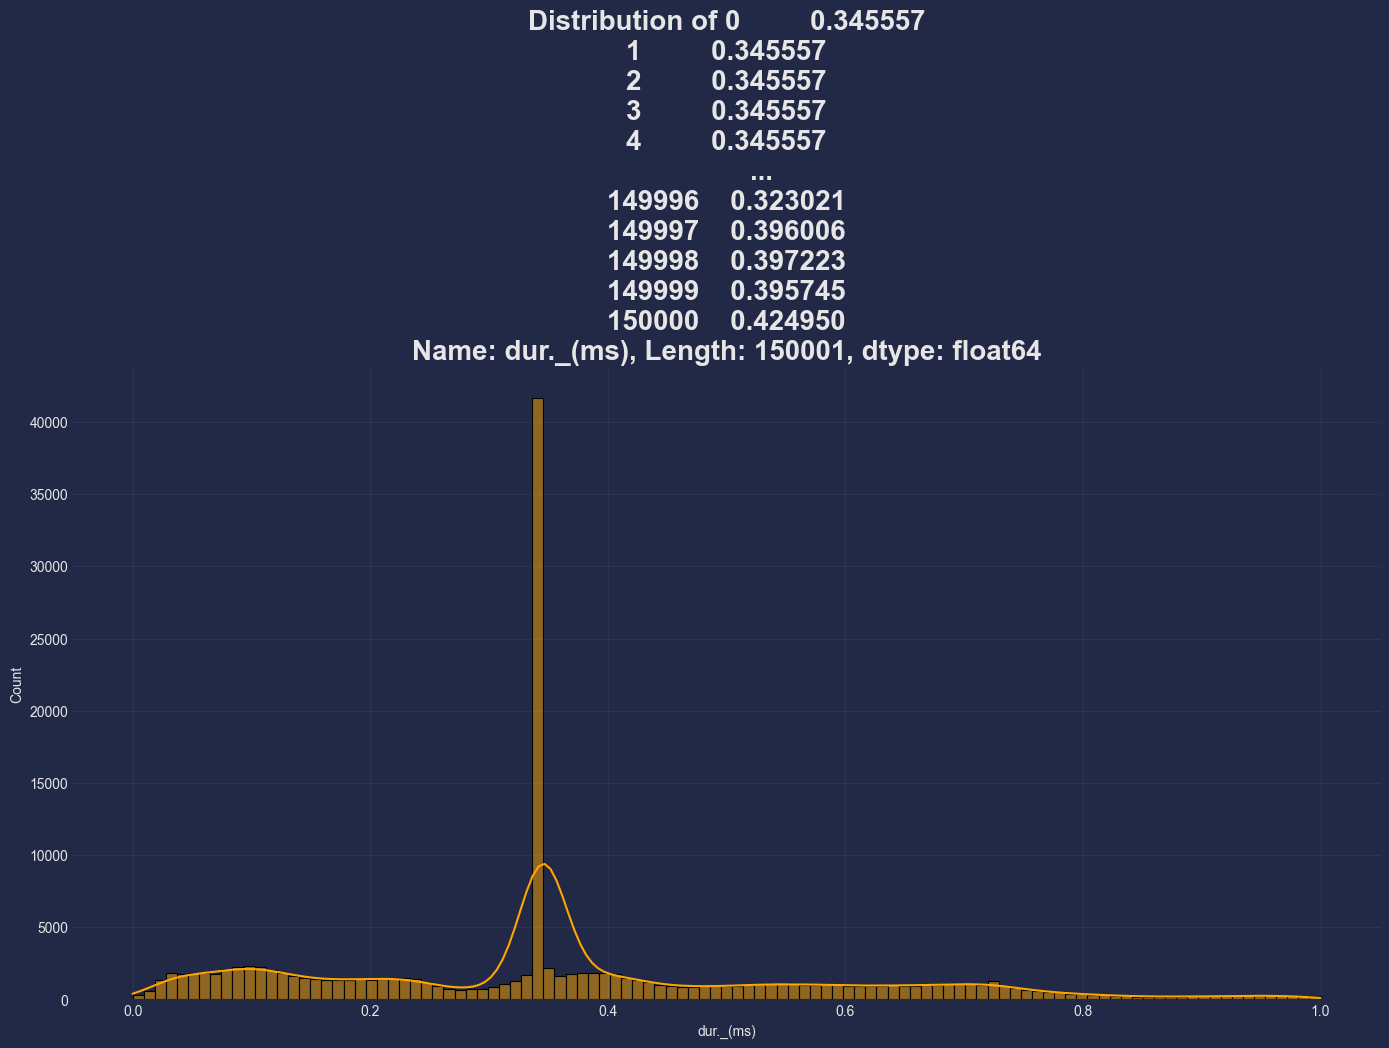

In [158]:
# Graphical Univariate analysis for duration
pl.plot_hist(df_preprocessed, df_preprocessed['dur._(ms)'], 'orange')


##### After data cleaning & preprocessing it now has a normal distribution

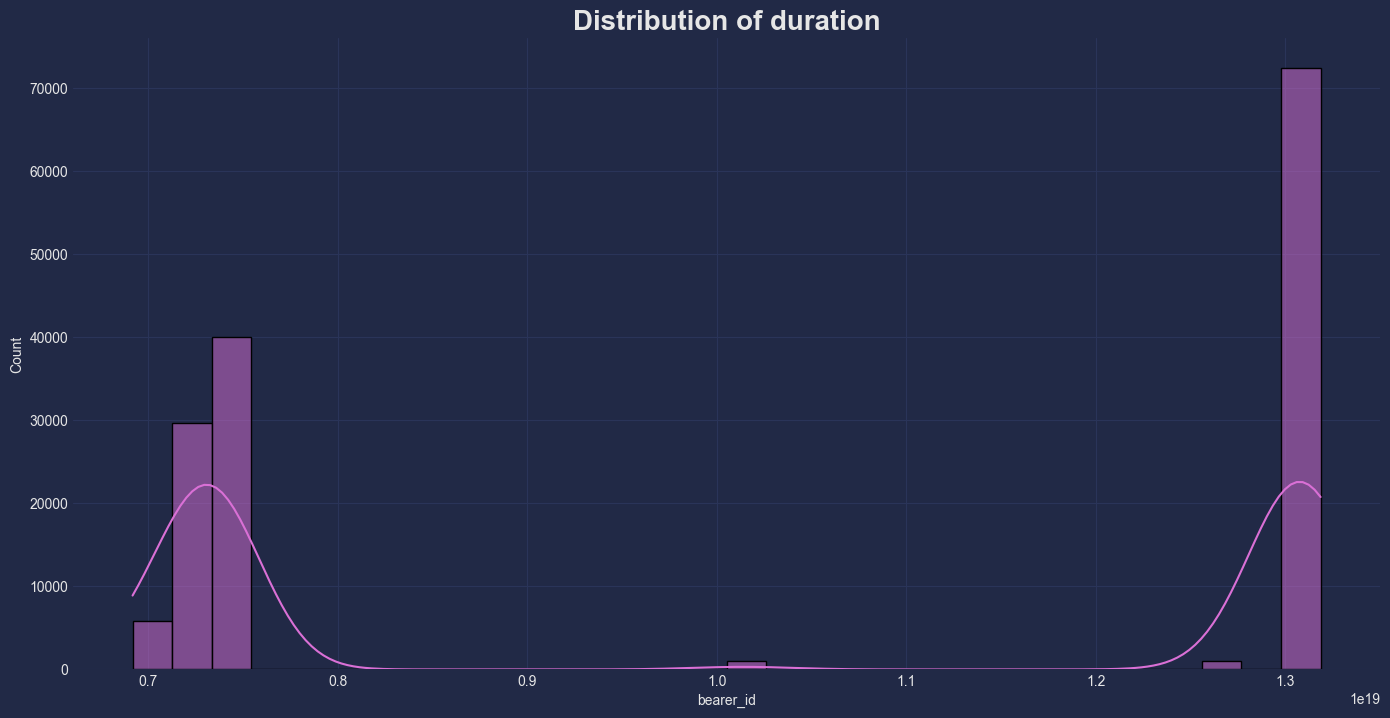

In [103]:
# Graphical Univariate analysis for beaer_id

sns.displot(data=df_preprocessed, x='bearer_id', color='orchid',
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of duration', size=20, fontweight='bold')
plt.show()

In [104]:
def distribution_plot(df:pd.DataFrame, x, title):
    sns.displot(data=df, x=x, color='orchid',
                    kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {title}', size=14, fontweight='bold')
    plt.show()

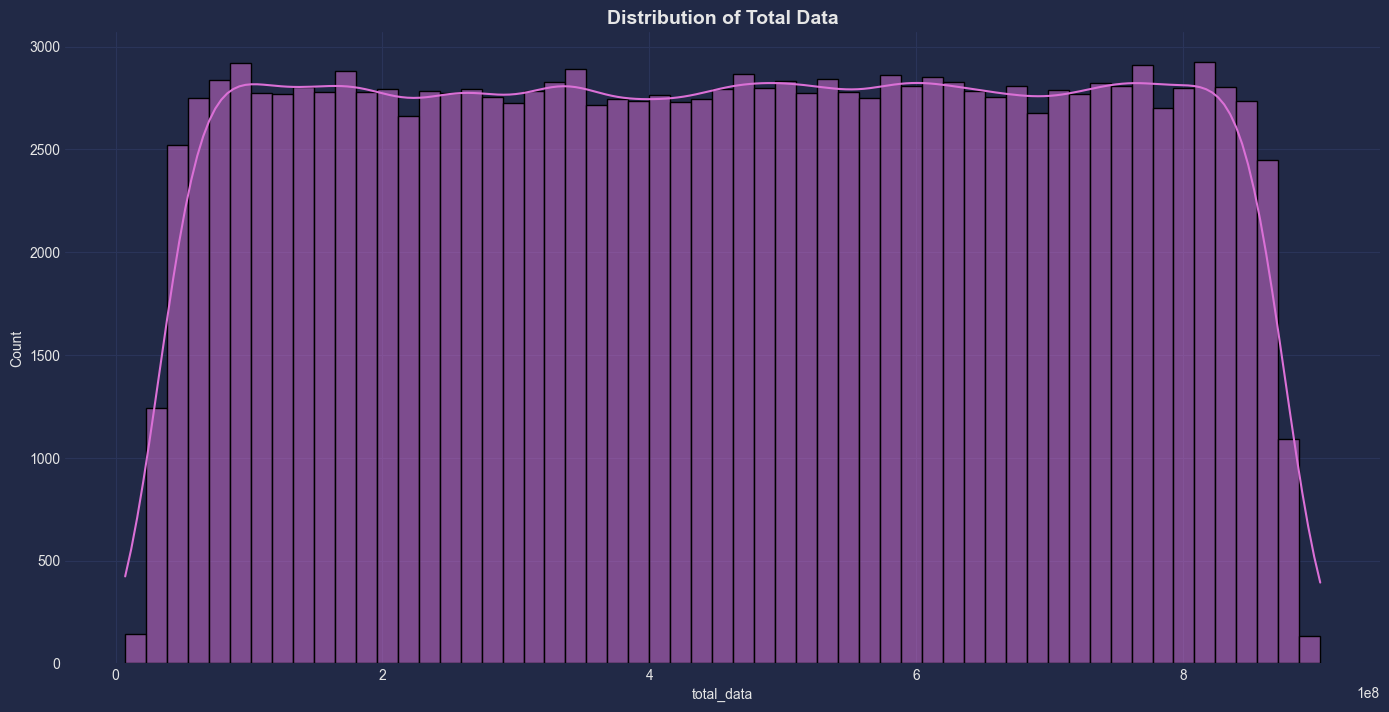

In [105]:
distribution_plot(df_preprocessed,'total_data','Total Data')

Negatively skewed distribution

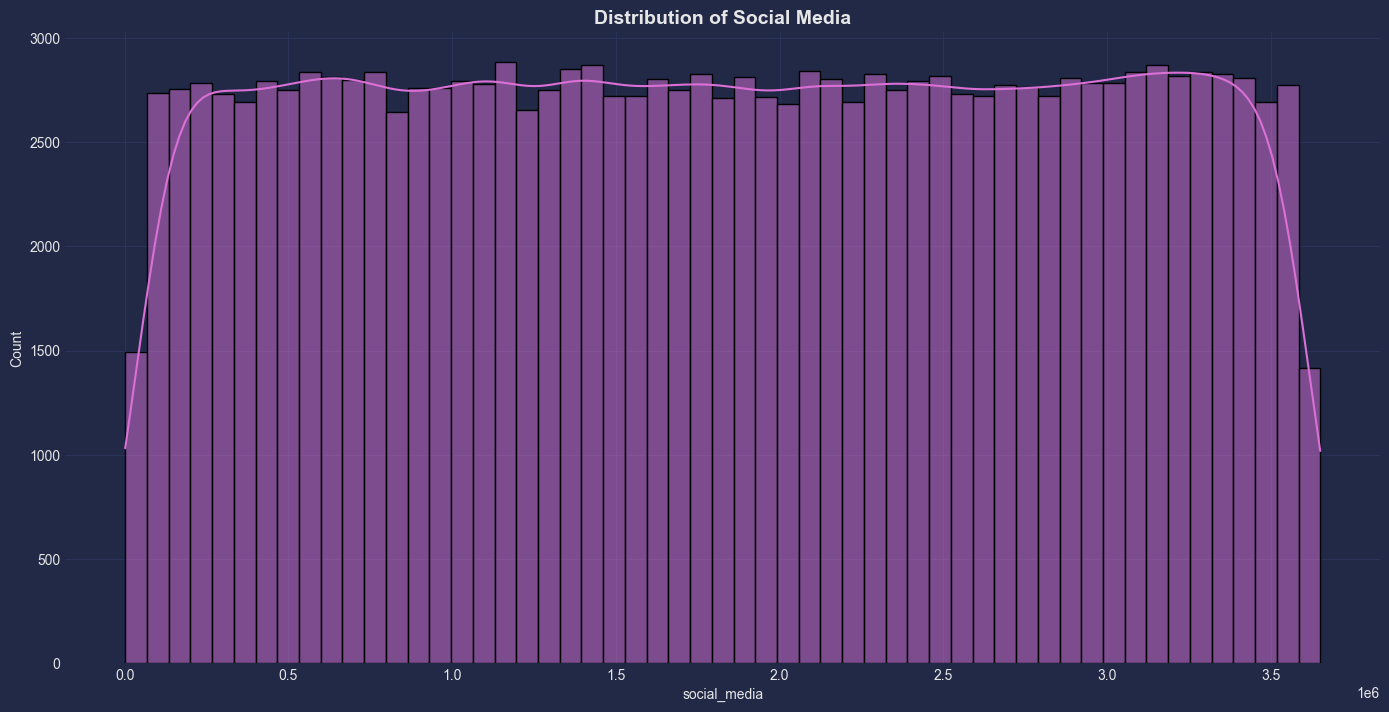

In [106]:
# Graphical Univariate analysis for Socail Media
distribution_plot(df_preprocessed,'social_media','Social Media')

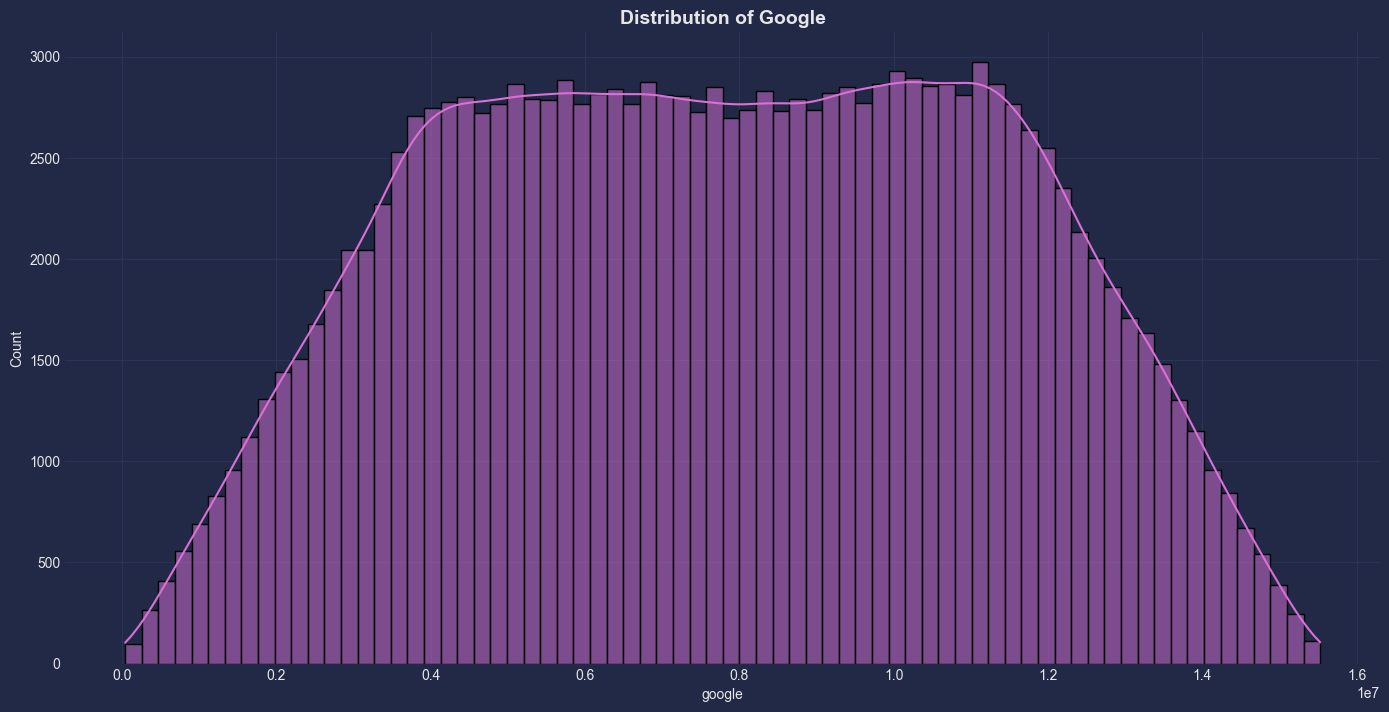

In [107]:
# Graphical Univariate analysis for Google
distribution_plot(df_preprocessed,'google','Google')

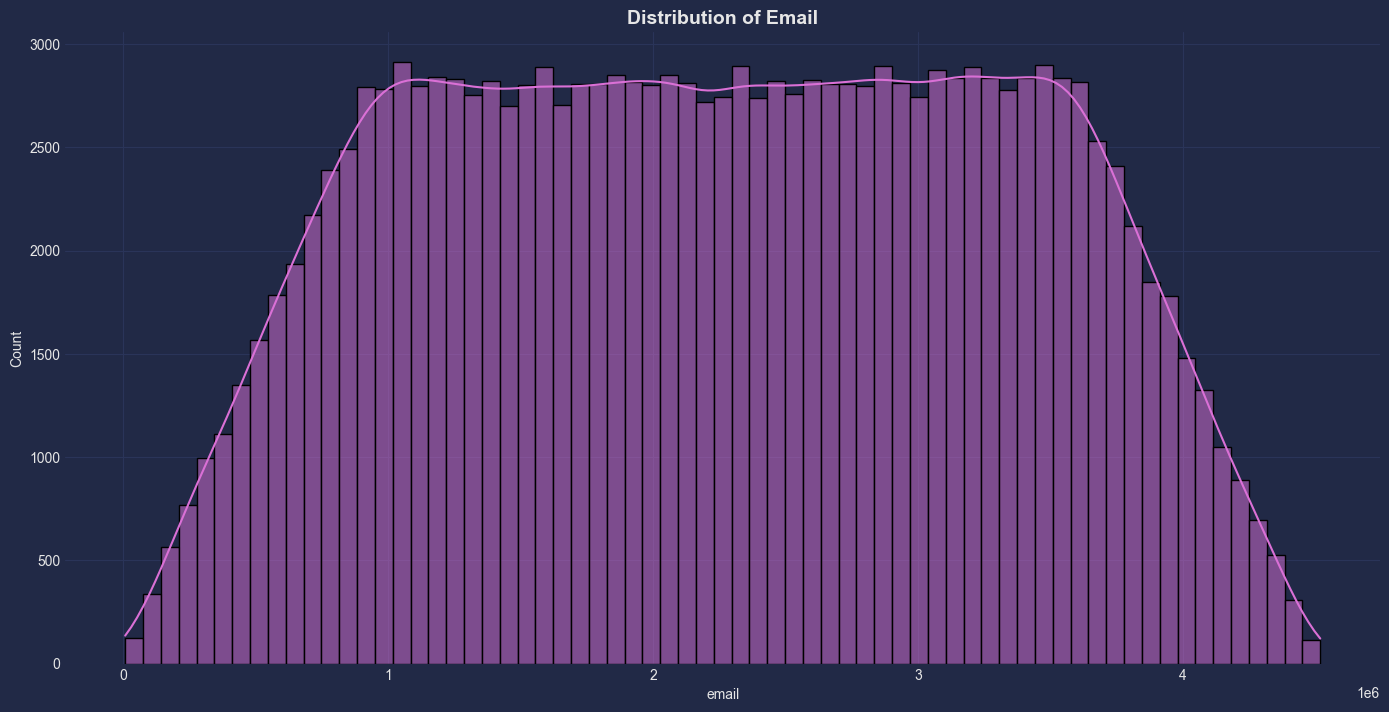

In [108]:
# Graphical Univariate analysis for Email
distribution_plot(df_preprocessed,'email','Email')

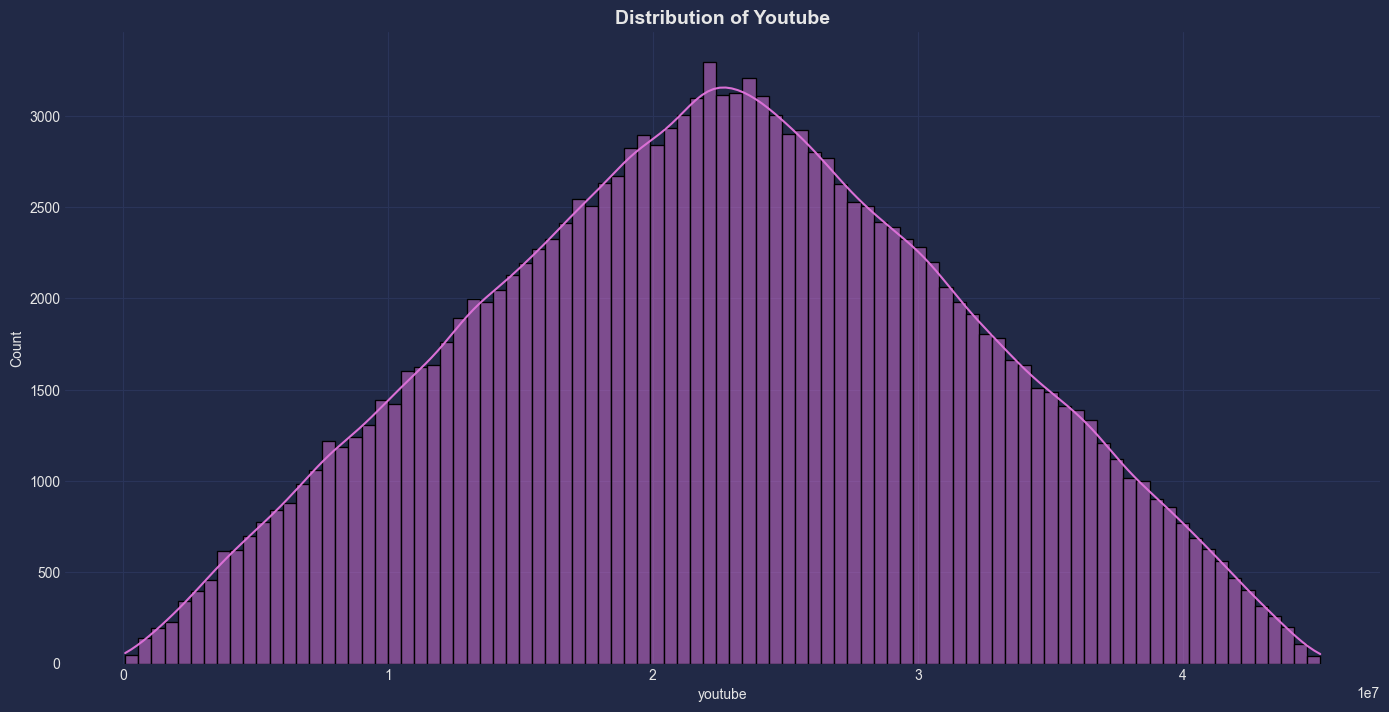

In [109]:
# Graphical Univariate analysis for Youtube
distribution_plot(df_preprocessed,'youtube','Youtube')

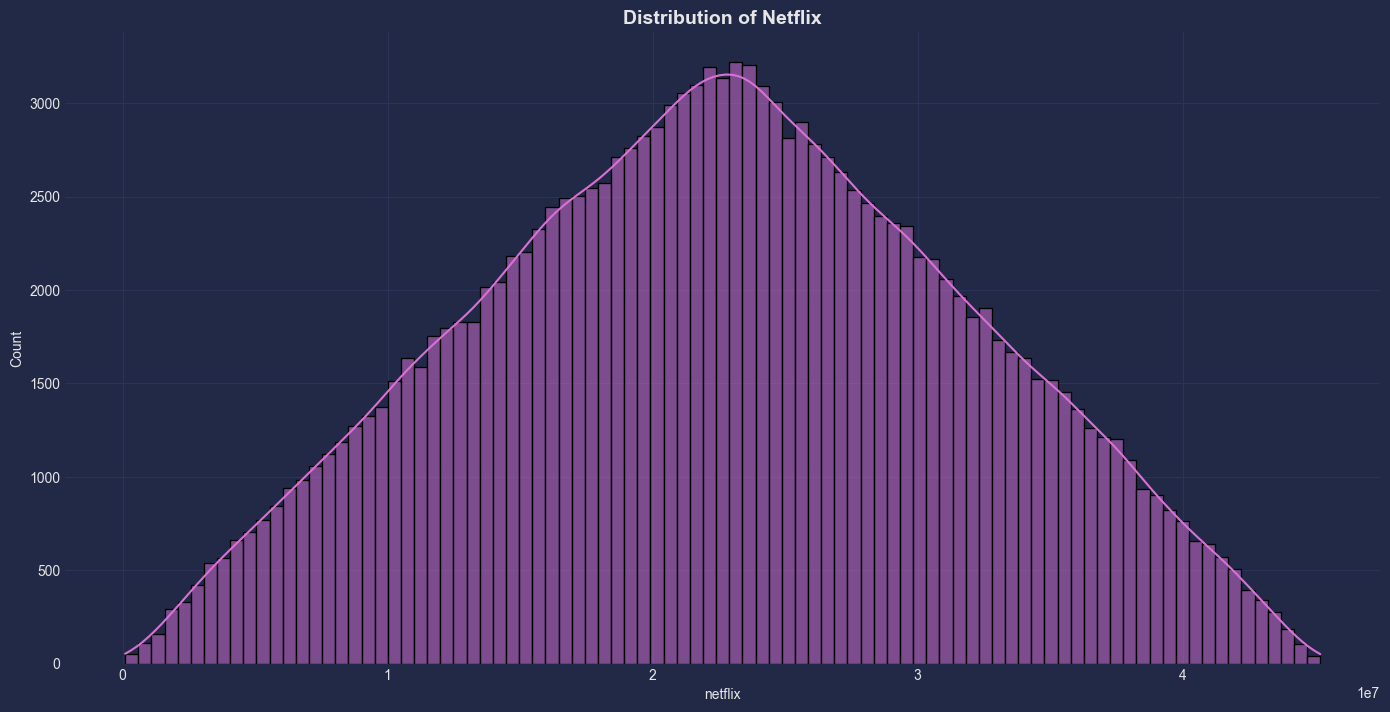

In [110]:
# Graphical Univariate analysis for Netflix
distribution_plot(df_preprocessed,'netflix','Netflix')

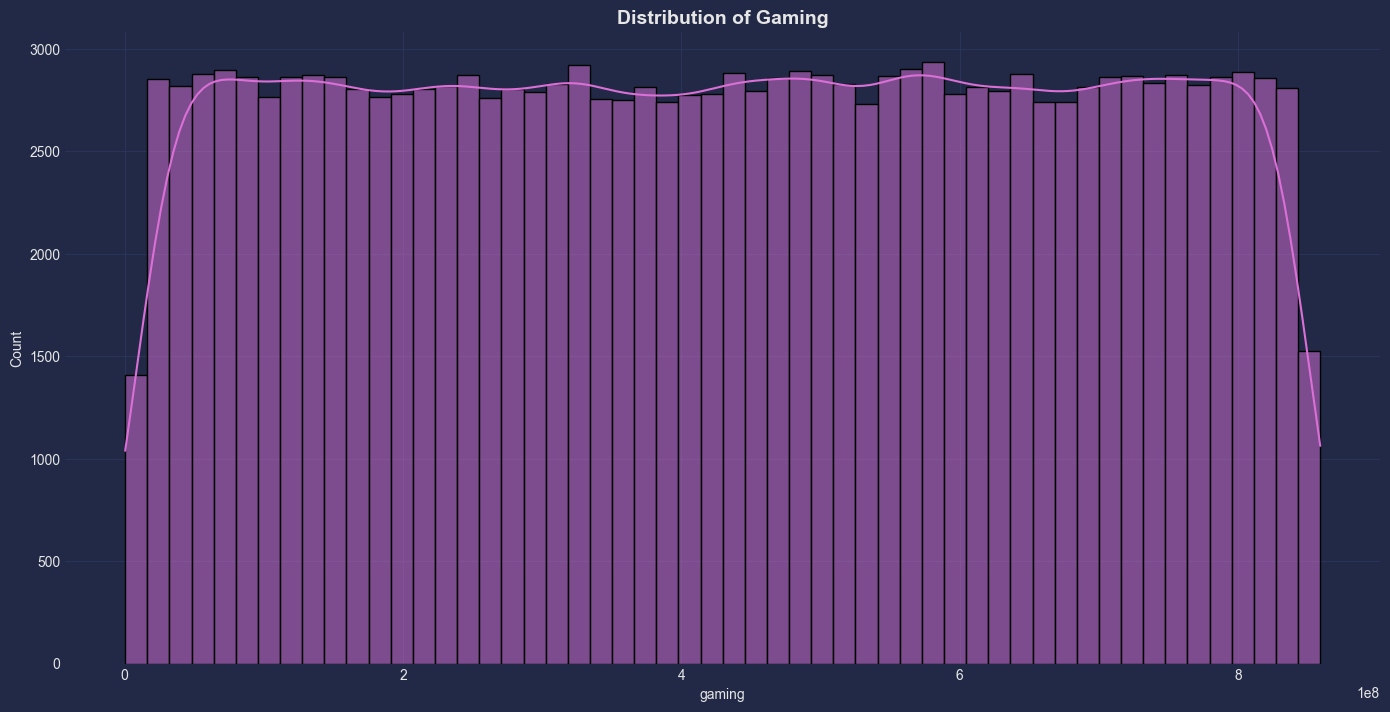

In [111]:
# Graphical Univariate analysis for Netflix
distribution_plot(df_preprocessed,'gaming','Gaming')

### Our observation here is that most of the social Media Data are negatively skewed

#### Bivariate Analysis

Multivariate Non-Graphical EDA

Cross-Tabulation

In [59]:
# Cross-Tabulation between last_location_name and handset_type
pd.crosstab(df_preprocessed.last_location_name[:1000], df_preprocessed.handset_type, margins=True)

handset_type           Apple iPad (A1954)  Apple iPad Mini 4 (A1550)  \
last_location_name                                                     
1.5327975494928E+017                    0                          0   
8.12221622307593E+016                   0                          0   
8.12221622307597E+016                   0                          0   
9.16456685854234E+015                   0                          0   
9.16456698470272E+015                   0                          0   
...                                   ...                        ...   
V93184C                                 0                          0   
W77618C                                 0                          0   
W78075A                                 0                          0   
W93934A                                 0                          0   
All                                     2                          1   

handset_type           Apple iPad Pro (A1652)  Apple iPad Pro 10.5 (A1709)  \
last_location_name                                                           
1.5327975494928E+017                        0                            0   
8.12221622307593E+016                       0                            0   
8.12221622307597E+016                       0                            0   
9.16456685854234E+015                       0                            0   
9.16456698470272E+015                       0                            0   
...                                       ...                          ...   
V93184C                                     0                            0   
W77618C                                     0                            0   
W78075A                                     0                            0   
W93934A                                     0                            0   
All                                         1                            1   

handset_type           Apple iPhone 4 (A1332)  Apple iPhone 4S (A1387)  \
last_location_name                                                       
1.5327975494928E+017                        0                        0   
8.12221622307593E+016                       0                        0   
8.12221622307597E+016                       0                        0   
9.16456685854234E+015                       0                        0   
9.16456698470272E+015                       0                        0   
...                                       ...                      ...   
V93184C                                     0                        1   
W77618C                                     0                        0   
W78075A                                     0                        0   
W93934A                                     0                        0   
All                                         4                        6   

handset_type           Apple iPhone 5 (A1429)  Apple iPhone 5C (A1507)  \
last_location_name                                                       
1.5327975494928E+017                        0                        0   
8.12221622307593E+016                       0                        0   
8.12221622307597E+016                       0                        0   
9.16456685854234E+015                       0                        0   
9.16456698470272E+015                       0                        0   
...                                       ...                      ...   
V93184C                                     0                        0   
W77618C                                     0                        0   
W78075A                                     0                        0   
W93934A                                     0                        0   
All                                         2                        1   

handset_type           Apple iPhone 5C (A1532)  Apple iPhone 5S (A1457)  ...  \
last_location_name                        

### Multivariate Graphical EDA

Scatter plot

In [60]:
def scatter_plot(df, x_column, y_column, title):    
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.title(title, size=20)
    plt.show()

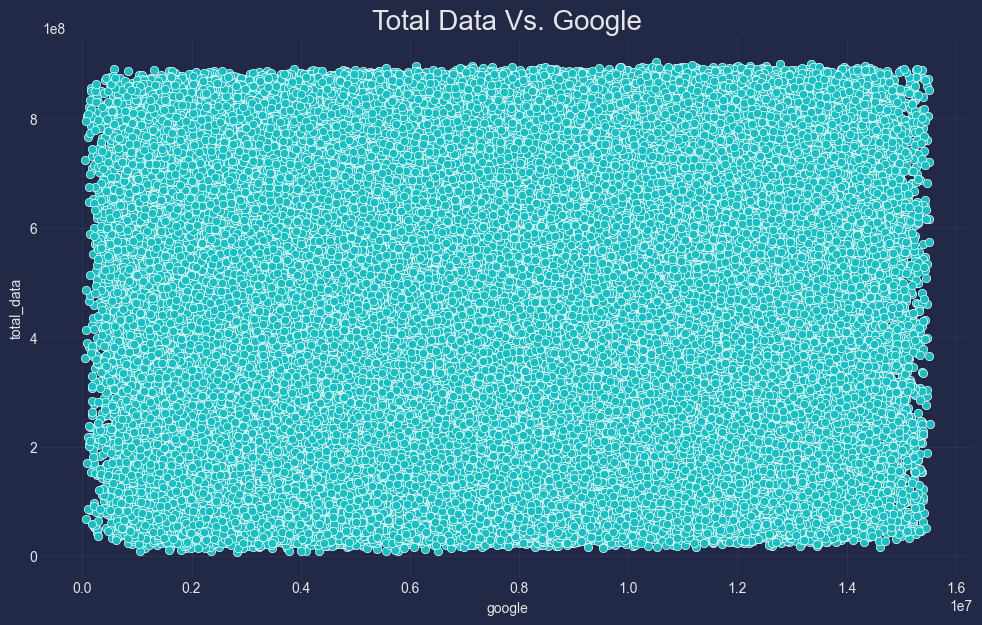

In [61]:
#  Scatter plot between total_data and google application
scatter_plot(df_preprocessed, df_preprocessed['google'], df_preprocessed['total_data'], 'Total Data Vs. Google')

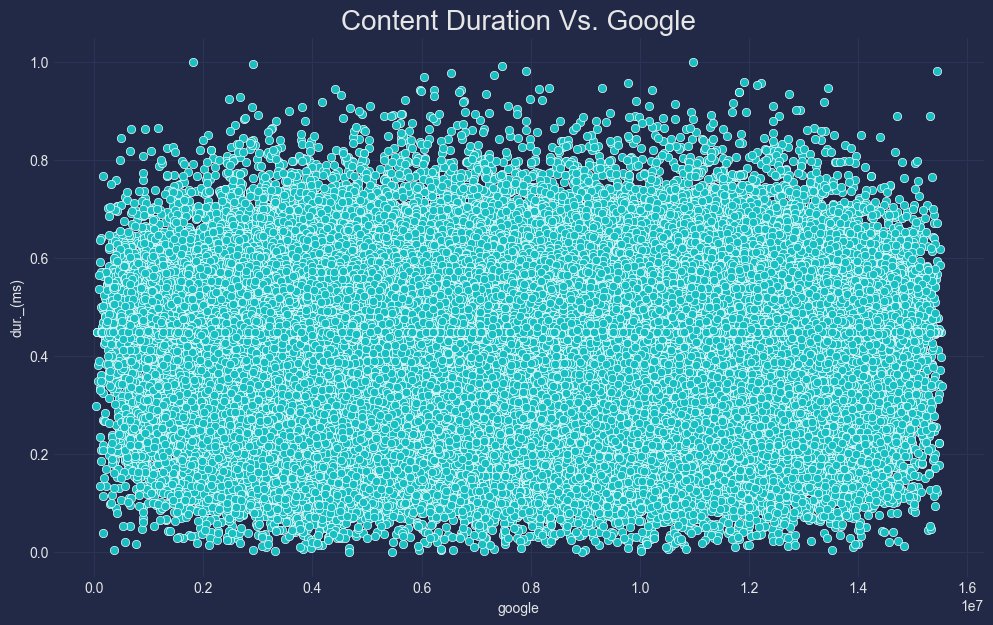

In [62]:
#  Scatter plot between XDR Duration and google application
scatter_plot(df_preprocessed, df_preprocessed['google'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Google')

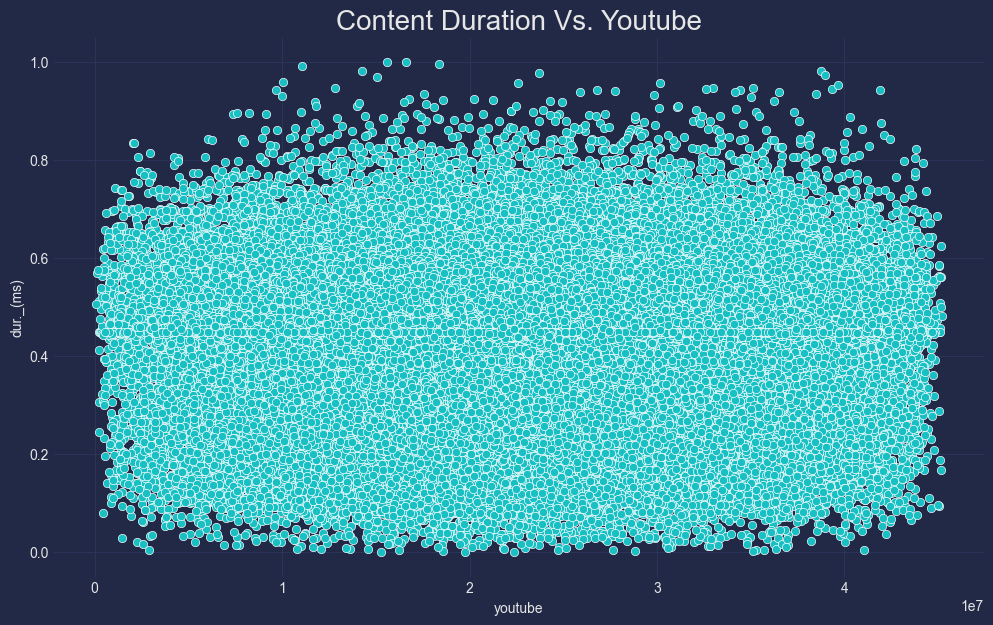

In [63]:
#  Scatter plot between  XDR Duration and youtube application
scatter_plot(df_preprocessed, df_preprocessed['youtube'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Youtube')

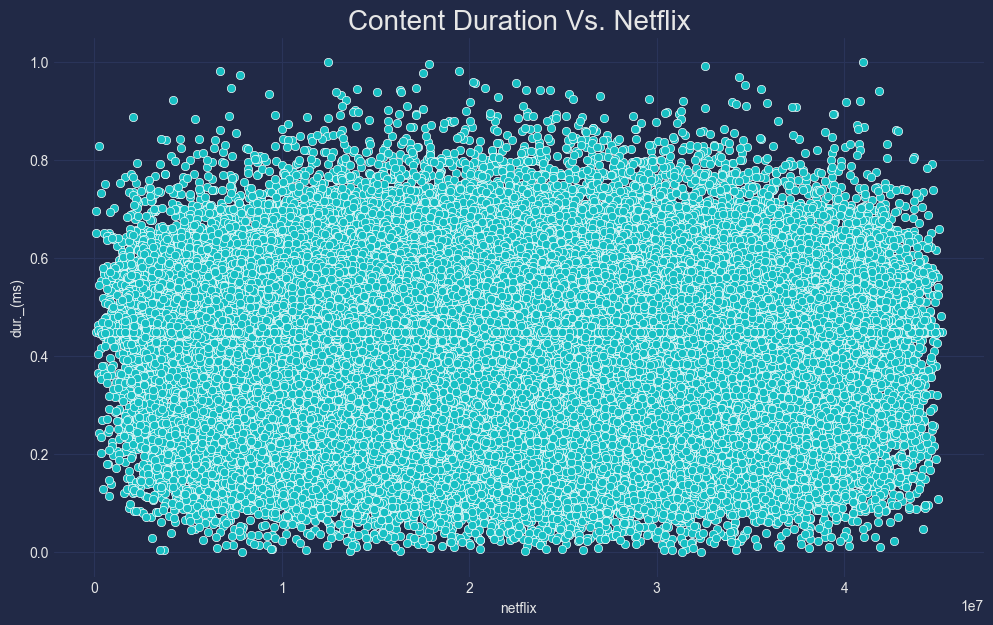

In [64]:
#  Scatter plot between XDR Duration and Netflix
scatter_plot(df_preprocessed, df_preprocessed['netflix'], df_preprocessed['dur._(ms)'], 'Content Duration Vs. Netflix')

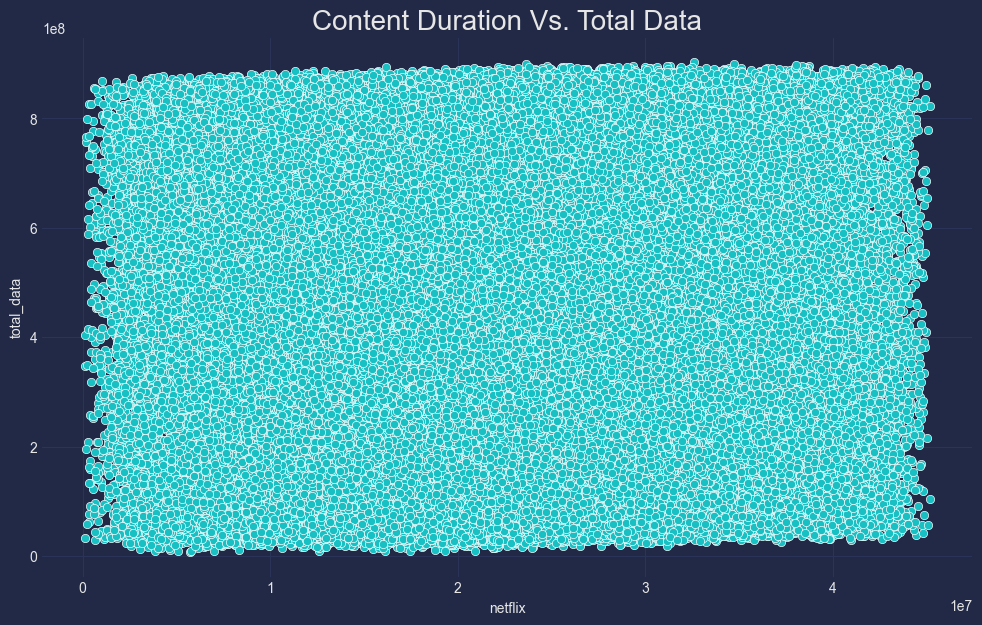

In [65]:
#  Scatter plot between total_data and netflix application
scatter_plot(df_preprocessed, df_preprocessed['netflix'], df_preprocessed['total_data'], 'Content Duration Vs. Total Data')

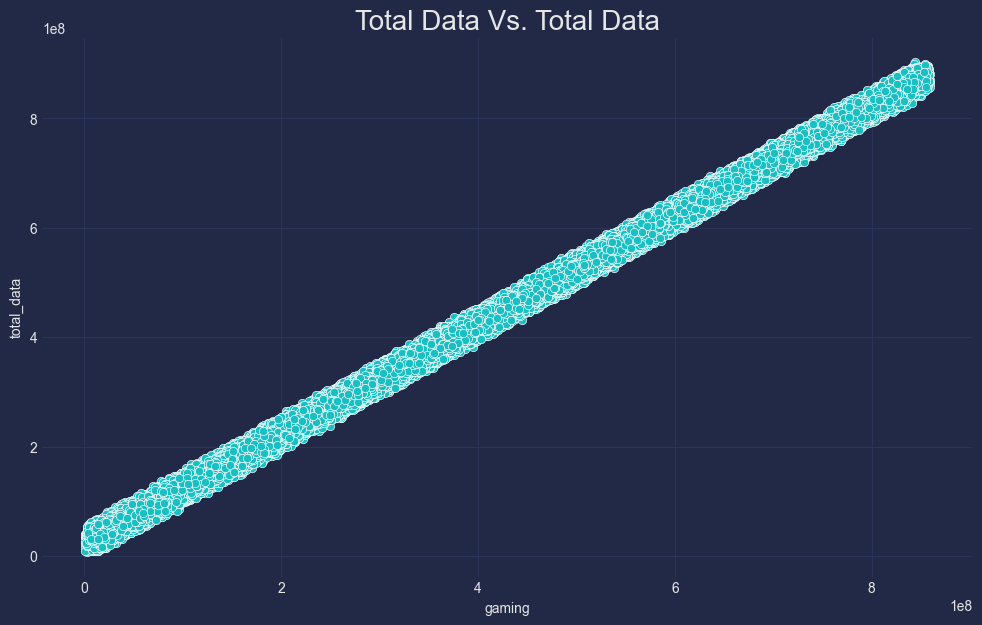

In [66]:
#  Scatter plot between total_data and netflix application
scatter_plot(df_preprocessed, df_preprocessed['gaming'], df_preprocessed['total_data'], 'Total Data Vs. Total Data')

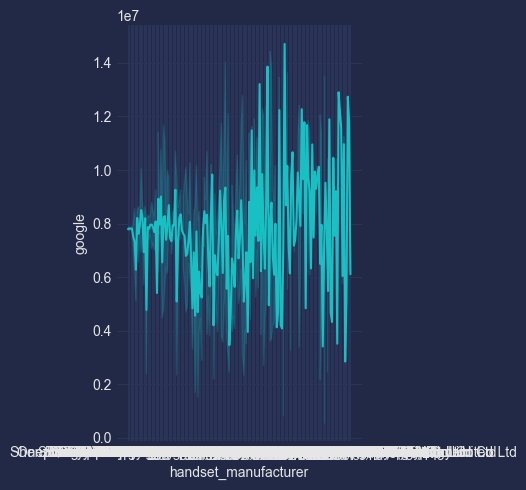

In [67]:
sns.relplot(data=df_preprocessed, x="handset_manufacturer", y="google", hue=None, kind="line")

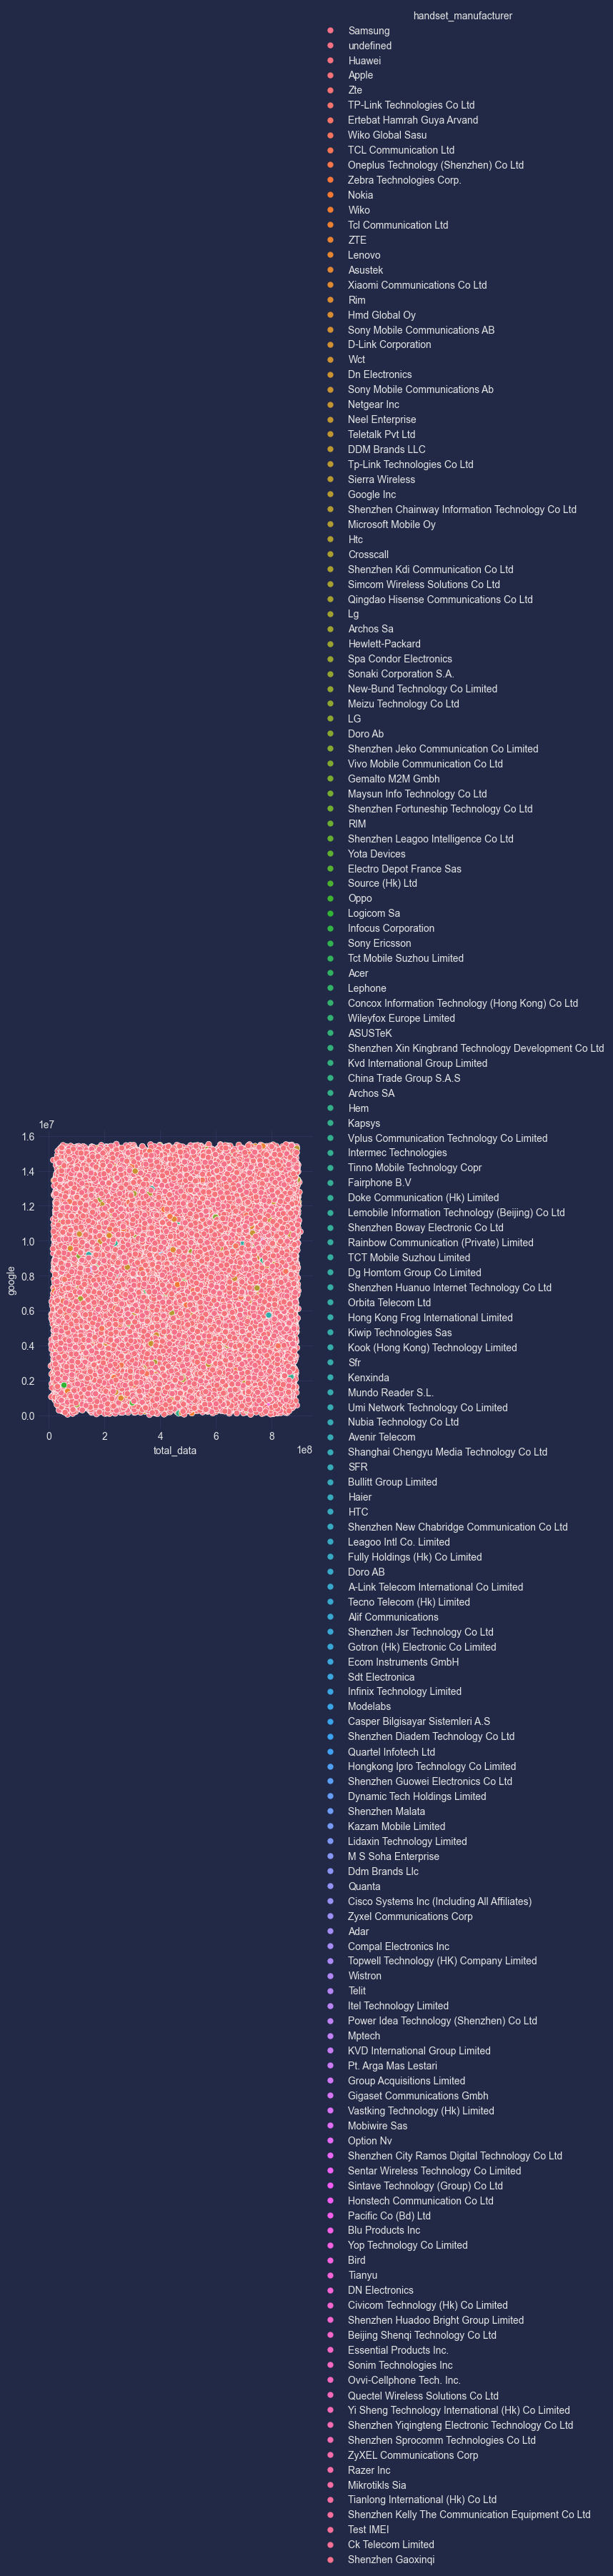

In [68]:
sns.relplot( data=df_preprocessed, x="total_data", y="google", hue="handset_manufacturer")

In [69]:
sum(df_preprocessed['social_media'].values)

274239359454.20804

In [70]:
feature_to_use = df_preprocessed[['msisdn/number', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other', 'total_data', 'handset_manufacturer']]

In [71]:
count = feature_to_use.sum()
count

msisdn/number                                          6282464814573650.0
google                                               1171101989130.545654
email                                                 338867605596.309937
youtube                                              3396545039272.638672
netflix                                              3394313609363.538574
gaming                                              64550395439016.703125
other                                               64405230908181.617188
total_data                                          68196969274125.015625
handset_manufacturer    SamsungSamsungSamsungundefinedSamsungundefined...
dtype: object

In [72]:
total_count_app = pd.DataFrame({'app':count.index[1:-1], 'total':count.values[1:-1]})
total_count_app

app                  total
0      google   1171101989130.545654
1       email    338867605596.309937
2     youtube   3396545039272.638672
3     netflix   3394313609363.538574
4      gaming  64550395439016.703125
5       other  64405230908181.617188
6  total_data  68196969274125.015625

In [73]:
total_count_app.sort_values(by='total', ascending=False)

app                  total
6  total_data  68196969274125.015625
4      gaming  64550395439016.703125
5       other  64405230908181.617188
2     youtube   3396545039272.638672
3     netflix   3394313609363.538574
0      google   1171101989130.545654
1       email    338867605596.309937

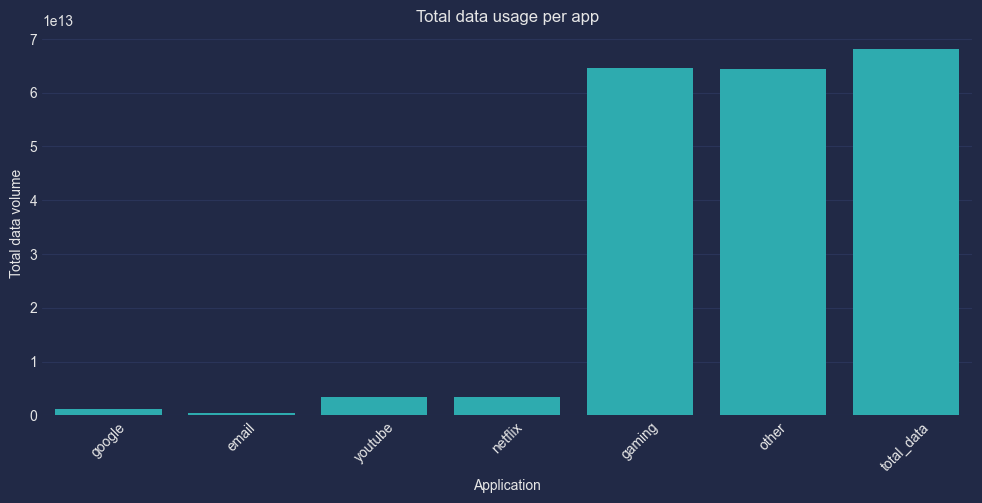

In [74]:
plt.figure(figsize=(12, 5))
ax = sns.barplot( data=total_count_app, y='total', x='app')
ax.tick_params(axis='x', rotation=45)
plt.title("Total data usage per app")
plt.xlabel("Application")
plt.ylabel("Total data volume")
plt.show()


#### Variable transformations

In [75]:
var_tr = df_preprocessed[['msisdn/number', 'dur._(ms)', 'total_data']]

In [76]:
var_tr.head()

msisdn/number  dur._(ms)    total_data
0   3.366496e+10   0.996516  3.088796e+08
1   3.368185e+10   0.944446  6.533850e+08
2   3.376063e+10   0.944006  2.798073e+08
3   3.375034e+10   0.938611  8.460285e+08
4   3.369980e+10   0.903820  5.691386e+08

In [77]:
var_tr_agg = var_tr.groupby('msisdn/number').agg({'dur._(ms)':'sum', 'total_data': 'sum'})

In [78]:
var_tr_agg.shape

(106857, 2)

In [79]:
var_tr_agg['deciles'] = pd.qcut(var_tr_agg['dur._(ms)'], 5, labels=['First Decile', 'Second Decile', 'Third Decile', 'Fourth Decile', 'Fifth Decile'])

In [80]:
var_tr_agg.head()

dur._(ms)    total_data        deciles
msisdn/number                                        
3.360100e+10    0.502300  8.426375e+08   Third Decile
3.360100e+10    0.581407  1.207552e+08  Fourth Decile
3.360100e+10    0.528418  5.566597e+08   Third Decile
3.360101e+10    0.349441  4.019932e+08   First Decile
3.360101e+10    0.343253  1.363130e+09   First Decile

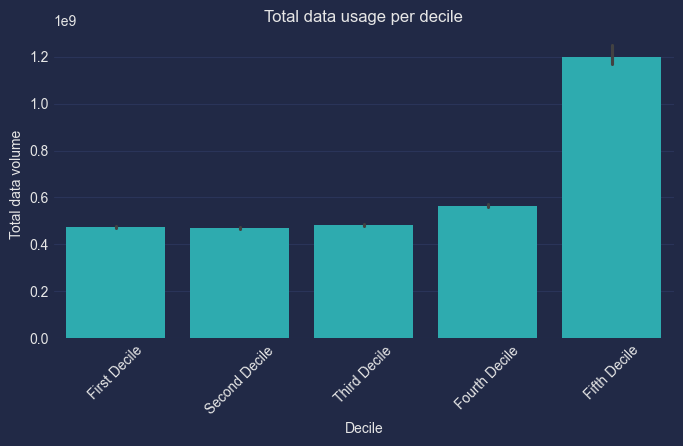

In [81]:
plt.figure(figsize=(8, 4))
ax = sns.barplot( data=var_tr_agg.sort_values(
            by=['total_data'], ascending=False), x='deciles', y='total_data')
ax.tick_params(axis='x', rotation=45)
plt.title("Total data usage per decile")
plt.xlabel("Decile")
plt.ylabel("Total data volume")
plt.show()


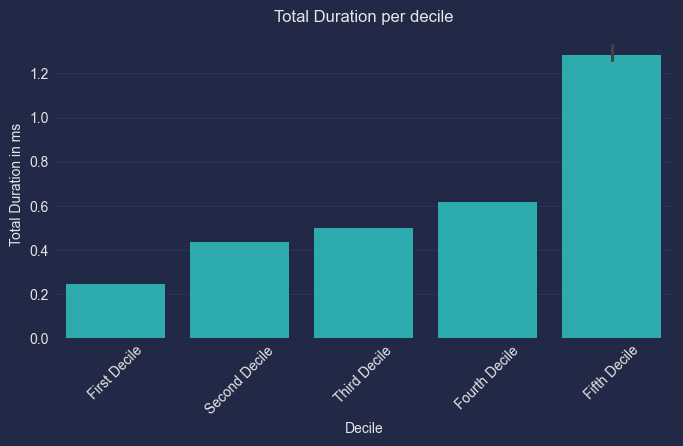

In [82]:
plt.figure(figsize=(8, 4))
ax = sns.barplot( data=var_tr_agg.sort_values(
            by=['total_data'], ascending=False), x='deciles', y='dur._(ms)')
ax.tick_params(axis='x', rotation=45)
plt.title("Total Duration per decile")
plt.xlabel("Decile")
plt.ylabel("Total Duration in ms")
plt.show()

#### Correlation Analysis

In [83]:
corr_analysis = df_preprocessed[['msisdn/number','social_media', 'google',
                    'email', 'youtube', 'netflix', 'gaming', 'other']]

In [84]:
# Aggregate social app data by msisdn/number
corr_analysis_agg = corr_analysis.groupby('msisdn/number').agg({'social_media':'sum', 'google':'sum', 'email':'sum', 'youtube':'sum', 'netflix':'sum', 'gaming':'sum', 'other':'sum'})

In [88]:
# corr_analysis_agg.corr()
pl.plot_heatmap(corr_analysis_agg,"Correlation between apps")

: 

In [1]:
corr_analysis_agg.corr()

NameError: name 'corr_analysis_agg' is not defined

### Dimensionality Reduction using PCA

In [ ]:
# Non-Graphical Univariate analysis for the categorical variables
num_cols = df_preprocessed.select_dtypes(include=np.number).columns
cat_cols = list(set(df_preprocessed.columns) - set(num_cols))

In [ ]:
df_preprocessed[num_cols].columns

In [ ]:
num_final = [col for col in num_cols if col not in ['msisdn/number','bearer_id', 'start_ms', 'end_ms', 'imsi', 'imei']]

In [ ]:
num_final

In [ ]:
len(df_preprocessed.columns)

#### Standardize features

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [ ]:
df_standard = df_preprocessed.copy()

In [ ]:
df_standard = clean_dataset(df_standard[num_final])

In [ ]:
df_standard.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_standard)
df_scaled = scaler.transform(df_standard)

In [ ]:
df_scaled.shape

In [ ]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50, random_state=42)
pca_50.fit(df_scaled)

In [ ]:
x_pca_50 = pca_50.transform(df_scaled)

In [ ]:
x_pca_50.shape

In [ ]:
sum(pca_50.explained_variance_ratio_)

In [ ]:
np.cumsum(pca_50.explained_variance_ratio_ * 100)


In [ ]:
plt.plot(np.cumsum(pca_50.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [ ]:
print("Variance explained by first Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[0]))
print("Variance explained by  2 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[1]))
print("Variance explained by  3 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[2]))
print("Variance explained by  10 Principal components: {}".format( np.cumsum(pca_50.explained_variance_ratio_ * 100)[9]))

In [ ]:
#  Apply PCA by setting n_components=0.65
pca_65 = PCA(n_components=0.65, random_state=42)
pca_65.fit(df_scaled)
df_pca_95 = pca_65.transform(df_scaled)

In [ ]:
df_pca_95.shape

The features have now been reduced to 90 dimensions

In [ ]:
df_pca_95.to_csv('../data/cleaned_data.csv', index=False)